# Ques 1 : 14th century Florence Family Network

In [ ]:
#import all the libraries required

In [1]:
from igraph import *
import igraph.test
igraph.test.run_tests()
print igraph.__version__
import scipy
import numpy
import pandas as pd
import networkx as nx
import scipy.io
from numpy import inf
import matplotlib.pyplot as plt
%matplotlib inline

...................................................................................................................................................................................................................................................................................................................
----------------------------------------------------------------------
Ran 307 tests in 7.462s

OK
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/__init__.py:25: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas import hashtable, tslib, lib
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/__init__.py:25: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas import hashtable, tslib, lib
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/types/common.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incom

0.7.1


/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/tseries/base.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  import pandas._period as prlib
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/tseries/base.py:23: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  import pandas._period as prlib
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/sparse/array.py:27: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._sparse import SparseIndex, BlockIndex, IntIndex
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/sparse/array.py:27: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  from pandas._sparse import SparseIndex, BlockIndex, IntIndex
/Users/vsanghvi007/anaconda/lib/python2.7/site-packages/pandas/core/window.p

In [2]:
#IGraph instance
G= igraph.Graph()

In [3]:
#defining node list and edge list
nlist=['Acciaiuoli','Pucci','Pazzi','Salviati','Medici','Barbaderi','Castellani','Peruzzi',
       'Strozzi','Bischeri','Ridolfi','Tornabuoni','Ginori','Albizzi','Guadagni','Lamberteschi']
elist=[('Acciaiuoli','Medici'),('Medici','Salviati'),('Salviati','Pazzi'),('Albizzi','Ginori'),
       ('Peruzzi','Castellani'),('Peruzzi','Strozzi'),('Peruzzi','Bischeri'),('Castellani','Barbaderi'),
       ('Castellani','Strozzi'),('Barbaderi','Medici'),('Medici','Ridolfi'),('Strozzi','Ridolfi'),
       ('Strozzi','Bischeri'),('Ridolfi','Tornabuoni'),('Tornabuoni','Medici'),('Tornabuoni','Guadagni'),
      ('Guadagni','Bischeri'),('Guadagni','Albizzi'),('Albizzi','Medici'),('Guadagni','Lamberteschi')]

In [4]:
#add node list and edge list to the Igraph instance
G.add_vertices(nlist)
G.add_edges(elist)

In [5]:
print(G)

IGRAPH UN-- 16 20 --
+ attr: name (v)
+ edges (vertex names):
  Acciaiuoli -- Medici
       Pucci --
       Pazzi -- Salviati
    Salviati -- Pazzi, Medici
      Medici -- Acciaiuoli, Salviati, Barbaderi, Ridolfi, Tornabuoni, Albizzi
   Barbaderi -- Medici, Castellani
  Castellani -- Barbaderi, Peruzzi, Strozzi
     Peruzzi -- Castellani, Strozzi, Bischeri
     Strozzi -- Castellani, Peruzzi, Bischeri, Ridolfi
    Bischeri -- Peruzzi, Strozzi, Guadagni
     Ridolfi -- Medici, Strozzi, Tornabuoni
  Tornabuoni -- Medici, Ridolfi, Guadagni
      Ginori -- Albizzi
     Albizzi -- Medici, Ginori, Guadagni
    Guadagni -- Bischeri, Tornabuoni, Albizzi, Lamberteschi
Lamberteschi -- Guadagni


In [6]:
#Calculation of Different types of Centrality measures on G

degreecent= []

# degree centrality
for n in nlist:
    degreecent.append(G.degree(n))

#closeness Centrality    
close=G.closeness(nlist)


# Alternative: closeness centrality
# closeness=[]
# b = G.shortest_paths_dijkstra(source= nlist)
# for bb in b:
#     print bb
#     bb =numpy.array(bb)
#     bb[bb == inf] = 0
#     print bb
#     closeness.append(sum(bb) / float(len(bb)))
#     print sum(bb) / float(len(bb))
#     print("----------")
    
#betweenness centrality
betweenness =G.betweenness(vertices=nlist)

# eigenvector centrality
eigenvec =G.evcent()

#PageRank centrality
pagecen = G.pagerank(vertices=nlist)

In [8]:
nlist

['Acciaiuoli',
 'Pucci',
 'Pazzi',
 'Salviati',
 'Medici',
 'Barbaderi',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Bischeri',
 'Ridolfi',
 'Tornabuoni',
 'Ginori',
 'Albizzi',
 'Guadagni',
 'Lamberteschi']

In [63]:
#Dataframe of result
dffinal={"Node": nlist,"Degree Centrality":degreecent,"Closeness Centrality":close,"Betweenness Centrality":betweenness,"Eigenvector Centrality": eigenvec,"Page Rank Centrality":pagecen}
dffinal= pd.DataFrame(dffinal)
print dffinal

    Betweenness Centrality  Closeness Centrality  Degree Centrality  \
0                 0.000000              0.277778                  1   
1                 0.000000              0.062500                  0   
2                 0.000000              0.230769                  1   
3                13.000000              0.288462                  2   
4                47.500000              0.365854                  6   
5                 8.500000              0.312500                  2   
6                 5.000000              0.288462                  3   
7                 2.000000              0.277778                  3   
8                 9.333333              0.312500                  4   
9                 9.500000              0.294118                  3   
10               10.333333              0.340909                  3   
11                8.333333              0.333333                  3   
12                0.000000              0.258621                  1   
13    

In [64]:
#printing result in terms of importance
df1 = dffinal[['Node','Degree Centrality']]
print df1.sort_values(by='Degree Centrality', ascending=0)
print ("-------------------------------------------")
df2 = dffinal[['Node','Closeness Centrality']]
print df2.sort_values(by='Closeness Centrality', ascending=0)
print ("-------------------------------------------")
df3 = dffinal[['Node','Betweenness Centrality']]
print df3.sort_values(by='Betweenness Centrality', ascending=0)
print ("-------------------------------------------")
df4 = dffinal[['Node','Eigenvector Centrality']]
print df4.sort_values(by='Eigenvector Centrality', ascending=0)
print ("-------------------------------------------")
df5 = dffinal[['Node','Page Rank Centrality']]
print df5.sort_values(by='Page Rank Centrality', ascending=0)

            Node  Degree Centrality
4         Medici                  6
8        Strozzi                  4
14      Guadagni                  4
6     Castellani                  3
7        Peruzzi                  3
9       Bischeri                  3
10       Ridolfi                  3
11    Tornabuoni                  3
13       Albizzi                  3
3       Salviati                  2
5      Barbaderi                  2
0     Acciaiuoli                  1
2          Pazzi                  1
12        Ginori                  1
15  Lamberteschi                  1
1          Pucci                  0
-------------------------------------------
            Node  Closeness Centrality
4         Medici              0.365854
10       Ridolfi              0.340909
11    Tornabuoni              0.333333
13       Albizzi              0.333333
14      Guadagni              0.326087
5      Barbaderi              0.312500
8        Strozzi              0.312500
9       Bischeri              0.

# Question 5 Modularity and Assortativity

In [11]:
#method to convert scipy compressed sparse matrix to igraph without creating overhead of matrix index of zero elements  , it has better efficiency than inbuilt function igraph.Graph.Adjacency()
def scipy_to_igraph(matrix, directed= False):
    sources, targets = matrix.nonzero()    
    return Graph(zip(sources, targets), directed= directed)

In [65]:
import os
#read all the matlab files having compressed sparse matrix
path = "/Users/vsanghvi007/CS591_Network/CS591_hw2"
mat_files = [f for f in os.listdir(path) if f.endswith('.mat')]

# load the .mat file into a dictionary (associative array) d
d = {}

#list to store Modularity Scores
FileName=[]
GenderModularity=[]
SfModularity=[]
MajorModularity=[]
DegreeModularity=[]
Gendersize=[]
Sfsize=[]
Majorsize=[]
Degreesize=[]

for file_name in mat_files:
    scipy.io.loadmat(file_name, d)
    FileName.append(file_name)
    print file_name
    
    id1=[]
    id2=[]
    id3=[]
    gen=[]
    st=[]
    maj=[]
    deg=[]
    
    for keys,values in d.items():
        if keys == "A":
            shape= values.shape
            Gold1=scipy_to_igraph(values)
            Gold2=scipy_to_igraph(values)
            Gold3=scipy_to_igraph(values)
            Gold4=scipy_to_igraph(values)
            degre1=Gold4.degree()
            deg=degre1
            
        if keys=="local_info":
            sf=[]
            gender=[]
            major=[]
            for sub_list in values:
                sf.append(sub_list[0])
                gender.append(sub_list[1])
                major.append(sub_list[2])
            index1= [i for i, e in enumerate(gender) if e == 0]
            index2= [i for i, e in enumerate(sf) if e == 0]
            index3= [i for i, e in enumerate(major) if e == 0]
            gender[:] = [item for item in gender if item != 0]
            sf[:] = [item for item in sf if item != 0]
            major[:] = [item for item in major if item != 0]
#             print gender
#             print index1
#             print sf
#             print index2
#             print major
#             print index3

            id1=index1
            id2=index2
            id3=index3
            gen=gender
            st=sf
            maj=major
            
        
    Gold1.delete_vertices(id1)
    summary(Gold1)
    Gendersize.append(Gold1.vcount())
#     print len(gen)
    GenderModularity.append( Gold1.modularity(gen))
#     print (Gold1.modularity(gen))
   
    Gold2.delete_vertices(id2)
    summary(Gold2)
    Sfsize.append(Gold2.vcount())
#     print len(st)
    SfModularity.append(Gold2.modularity(st))
#     print(Gold2.modularity(st))
    
    Gold3.delete_vertices(id3)
    summary(Gold3)
    Majorsize.append(Gold3.vcount())
#     print len(maj)
    MajorModularity.append(Gold3.modularity(maj))
#     print(Gold3.modularity(maj))    
        
    summary(Gold4)
    Degreesize.append(Gold4.vcount())
#     print len(deg)
    DegreeModularity.append(Gold4.modularity(deg))
#     print(Gold4.modularity(deg))
            
    print("------------------")

    

American75.mat
IGRAPH U--- 6011 406290 -- 
IGRAPH U--- 6384 435132 -- 
IGRAPH U--- 5751 381898 -- 
IGRAPH U--- 6386 435324 -- 
------------------
Amherst41.mat
IGRAPH U--- 2032 157466 -- 
IGRAPH U--- 2235 181908 -- 
IGRAPH U--- 1653 115740 -- 
IGRAPH U--- 2235 181908 -- 
------------------
Auburn71.mat
IGRAPH U--- 17411 1770866 -- 
IGRAPH U--- 18446 1947396 -- 
IGRAPH U--- 16801 1678932 -- 
IGRAPH U--- 18448 1947836 -- 
------------------
Baylor93.mat
IGRAPH U--- 12038 1234478 -- 
IGRAPH U--- 12802 1359414 -- 
IGRAPH U--- 11564 1166744 -- 
IGRAPH U--- 12803 1359634 -- 
------------------
BC17.mat
IGRAPH U--- 10699 873850 -- 
IGRAPH U--- 11509 973934 -- 
IGRAPH U--- 9286 712028 -- 
IGRAPH U--- 11509 973934 -- 
------------------
Berkeley13.mat
IGRAPH U--- 20933 1494410 -- 
IGRAPH U--- 22934 1704674 -- 
IGRAPH U--- 19636 1382122 -- 
IGRAPH U--- 22937 1704888 -- 
------------------
Bingham82.mat
IGRAPH U--- 9316 650876 -- 
IGRAPH U--- 10001 725730 -- 
IGRAPH U--- 8252 539376 -- 
IGRAPH U-

In [66]:
#Dataframe with all modularity scores and graph size for FB100 Dataset
modular={"File": FileName,"Gender Modularity": GenderModularity,"Student Modularity":SfModularity,"Major Modularity": MajorModularity,"Degree Modularity":DegreeModularity,"Gender Size": Gendersize,"Student Size": Sfsize,"Major Size": Majorsize,"Degree Size": Degreesize}
modular= pd.DataFrame(modular)
print modular

    Degree Modularity  Degree Size              File  Gender Modularity  \
0            0.000658         6386    American75.mat           0.013029   
1           -0.000597         2235     Amherst41.mat           0.029838   
2            0.000674        18448      Auburn71.mat           0.045000   
3            0.000510        12803      Baylor93.mat           0.045671   
4            0.000580        11509          BC17.mat           0.007209   
5            0.000762        22937    Berkeley13.mat           0.025413   
6            0.000563        10004     Bingham82.mat           0.007483   
7           -0.000295         2252     Bowdoin47.mat           0.021315   
8            0.000140         3898    Brandeis99.mat           0.009543   
9            0.000629         8600       Brown11.mat           0.014130   
10           0.000787        19700          BU10.mat           0.009889   
11           0.000493         3826    Bucknell39.mat           0.056591   
12           0.000797    

# VERTEX ATTRIBUTE: GENDER

#SCATTER PLOT FOR GENDER ATTRIBUTE OF VERTEX of Modularity vs Graph Size

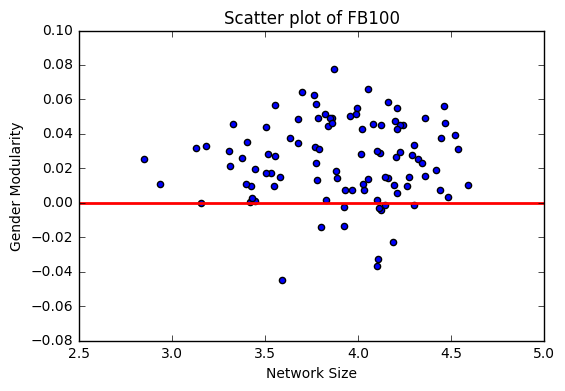

In [99]:
#import required maths libraries
from math import log


X= [log(y,10) for y in modular["Gender Size"]]
Y= modular["Gender Modularity"]
plt.scatter(x=X, y=Y)
plt.xlabel('Network Size')
plt.ylabel('Gender Modularity')
plt.title("Scatter plot of FB100")
#drawing horizontal line at modularity value is 0
plt.axhline(linewidth=2, color='r')
#save the plot
plt.savefig('51.png')

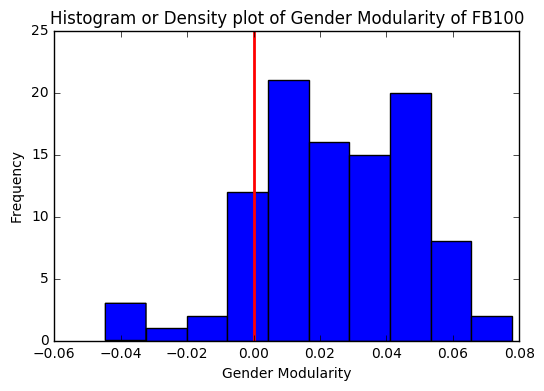

In [100]:
#Histogram /Density plot of Modularity Score for Gender Attribute of Vertex
plt.hist(modular["Gender Modularity"])
plt.xlabel('Gender Modularity')
plt.ylabel('Frequency')
plt.title("Histogram or Density plot of Gender Modularity of FB100")
#drawing vertical line at modularity value is 0
plt.axvline(linewidth=2, color='r')
#save the plot
plt.savefig('55.png')

# VERTEX ATTRIBUTE: STUDENT/FACULTY

#SCATTER PLOT FOR STUDENT/FACULTY ATTRIBUTE OF VERTEX of Modularity vs Graph Size

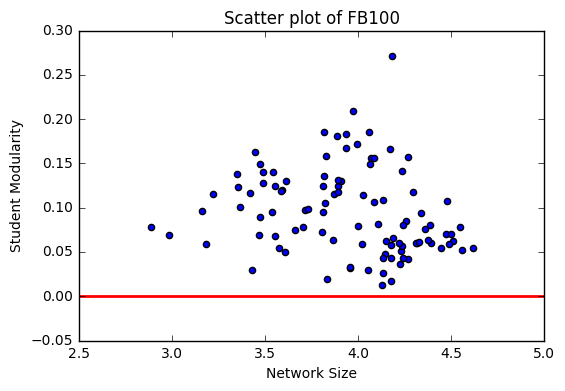

In [101]:

X= [log(y,10) for y in modular["Student Size"]]
Y= modular["Student Modularity"]
plt.scatter(x=X, y=Y)
plt.xlabel('Network Size')
plt.ylabel('Student Modularity')
plt.title("Scatter plot of FB100")
#drawing horizontal line at modularity value is 0
plt.axhline(linewidth=2, color='r')
#save the plot
plt.savefig('52.png')

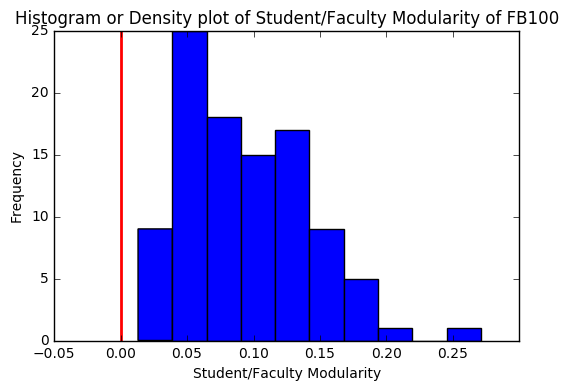

In [108]:
#Histogram /Density plot of Modularity Score for Student/Faculty Attribute of Vertex
plt.hist(modular["Student Modularity"])
plt.xlim(-0.05,0.30)
plt.xlabel('Student/Faculty Modularity')
plt.ylabel('Frequency')
plt.title("Histogram or Density plot of Student/Faculty Modularity of FB100")
#drawing vertical line at modularity value is 0
plt.axvline(linewidth=2, color='r')
#save the plot
plt.savefig('56.png')


# VERTEX ATTRIBUTE: MAJOR

#SCATTER PLOT FOR MAJOR ATTRIBUTE OF VERTEX of Modularity vs Graph Size

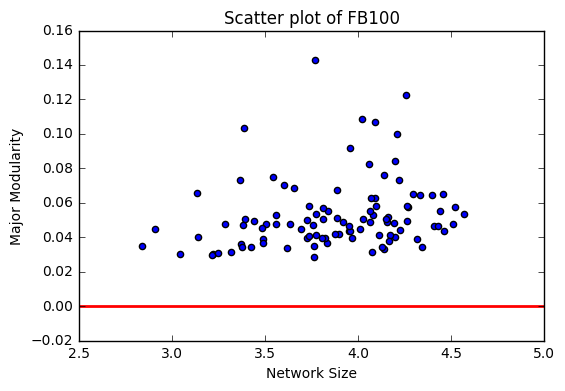

In [107]:

X=  [log(y,10) for y in modular["Major Size"]]
Y= modular["Major Modularity"]
plt.scatter(x=X, y=Y)
plt.ylim(-0.02, 0.16)
plt.xlabel('Network Size')
plt.ylabel('Major Modularity')
plt.title("Scatter plot of FB100")
#drawing horizontal line at modularity value is 0
plt.axhline(linewidth=2, color='r')
#save the plot
plt.savefig('53.png')

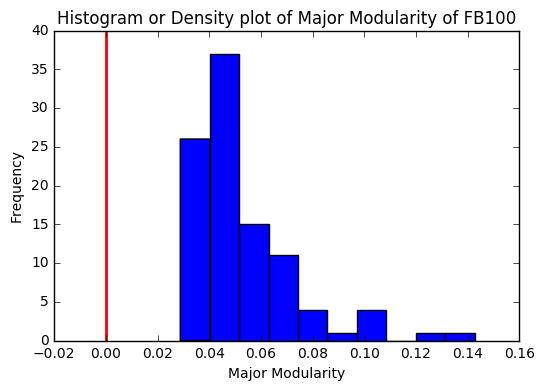

In [105]:
#Histogram /Density plot of Modularity Score for Major Attribute of Vertex
plt.hist(modular["Major Modularity"])
plt.xlabel('Major Modularity')
plt.ylabel('Frequency')
plt.title("Histogram or Density plot of Major Modularity of FB100")
#drawing vertical line at modularity value is 0
plt.axvline(linewidth=2, color='r')
#save the plot
plt.savefig('57.png')

# VERTEX ATTRIBUTE: DEGREE
#SCATTER PLOT FOR DEGREE ATTRIBUTE OF VERTEX of Modularity vs Graph Size

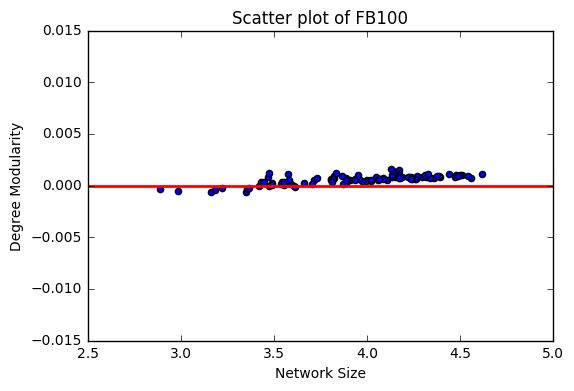

In [104]:

X= [log(y,10) for y in modular["Degree Size"]]
Y= modular["Degree Modularity"]
plt.scatter(x=X, y=Y)
plt.xlabel('Network Size')
plt.ylabel('Degree Modularity')
plt.title("Scatter plot of FB100")
#drawing horizontal line at modularity value is 0
plt.axhline(linewidth=2, color='r')
#save the plot
plt.savefig('54.png')

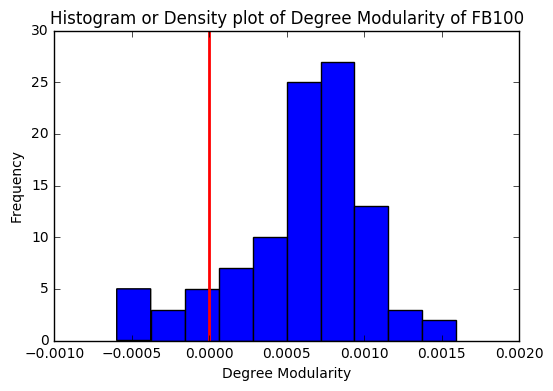

In [103]:
#Histogram /Density plot of Modularity Score for Degree Attribute of Vertex
plt.hist(modular["Degree Modularity"])
plt.xlabel('Degree Modularity')
plt.ylabel('Frequency')
plt.title("Histogram or Density plot of Degree Modularity of FB100")
#drawing vertical line at modularity value is 0
plt.axvline(linewidth=2, color='r')
#save the plot
plt.savefig('58.png')